### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# Liblary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/TaskForceCandidate.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Timestamp                                      146 non-null    object 
 1   Name                                           146 non-null    object 
 2   Email                                          146 non-null    object 
 3   Phone number (08xxxx)                          146 non-null    float64
 4   Gender                                         146 non-null    object 
 5   Birth Date                                     146 non-null    object 
 6   Domicile (City)                                146 non-null    object 
 7   Domicile (City) FIX                            146 non-null    object 
 8   Province                                       146 non-null    object 
 9   Your Last Position                             146 non

In [4]:
df.shape

(146, 17)

In [5]:
df.isna().sum()

Timestamp                                          0
Name                                               0
Email                                              0
Phone number (08xxxx)                              0
Gender                                             0
Birth Date                                         0
Domicile (City)                                    0
Domicile (City) FIX                                0
Province                                           0
Your Last Position                                 0
Your Last Position FIX                             0
Company Industry                                   0
Total Years of Work Experience                     0
Total Years of Work Experience FIX                 0
Describe your self (Skill and Competency)          1
Submit your cover letter or resume (PDF Only)     11
How did You Hear About Task Force?               106
dtype: int64

In [6]:
df.head()

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?
0,5/10/2023 11:34,EKo rahadian Prasetyo,ekorahadianp@gmail.com,8.787497e+10,Male,3/8/1997,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,NaN
1,5/10/2023 11:39,MUHAMMAD FAIZ MUZAKKI,muzakki1310@gmail.com,8.772500e+10,Male,10/13/2001,Jakarta Timur,Jakarta Timur,DKI Jakarta,staff hub,Staff Hub,Expedition,2 tahun,2,sayaa mempunyai semngat kerja yang tinggi dan ...,https://drive.google.com/open?id=17OdYYoFYS7fd...,NaN
2,5/10/2023 11:44,Michael Roberto,michaelrobertoseran@gmail.com,8.828902e+10,Male,6/29/1998,Bekasi,Bekasi,Jawa Barat,PT.andiarta muzizat ( ninja express ),Unknown,Logistic / Forwarder,2 years,2,i can use Microsoft office,https://drive.google.com/open?id=1V0Lv8B9LMZB8...,NaN
3,5/10/2023 12:21,Firmansyah,firman.damonz45@gmail.com,8.212735e+10,Male,11/27/1985,Jl.dato tonggara RT 10 RW 10 Kramat jati,Jakarta Timur,DKI Jakarta,Operator,Operator,Logistic / Forwarder,8 bulan,"0,7",Saya mempunyai Skill dan Competency,NaN,NaN
4,5/10/2023 12:44,Rosario Saputra,rosariosaputra960@gmail.com,8.577375e+10,Male,11/14/1997,Bogor,Bogor,Jawa Barat,Surveyor,Surveyor,Logistic / Forwarder,Fresh grads,0,Fresh grads,https://drive.google.com/open?id=175umpdvA27M0...,NaN


### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [7]:
from datetime import datetime
# Mengganti tipe data kolom timestamp menjadi 'datetime'
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
# Mengganti tipe data kolom phone number menjadi 'object'
df['Phone number (08xxxx)'] = df['Phone number (08xxxx)'].astype('object')

In [9]:
df.head(1)

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?
0,2023-05-10 11:34:00,EKo rahadian Prasetyo,ekorahadianp@gmail.com,87874973976.0,Male,3/8/1997,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,NaN


In [10]:
# Menambahkan 0 di depan pada setiap row phone number
df['Phone number (08xxxx)'] = df['Phone number (08xxxx)'].apply(lambda x: '0' + str(x) if str(x)[0] != '0' else str(x))

In [11]:
# Menghapus .0 pada akhir phone number
df['Phone number (08xxxx)'] = df['Phone number (08xxxx)'].astype(str).str.rstrip('.0')

In [12]:
df.head(1)

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?
0,2023-05-10 11:34:00,EKo rahadian Prasetyo,ekorahadianp@gmail.com,087874973976,Male,3/8/1997,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,NaN


In [13]:
# Mengganti tipe data birthday menjadi 'date'
df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%m/%d/%Y')

In [14]:
# Mengganti tipe data Total Years of Work Experience FIX menjadi 'float'
df['Total Years of Work Experience FIX'] = df['Total Years of Work Experience FIX'].str.replace(',', '.').astype('float64')

In [15]:
df.head(5)

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?
0,2023-05-10 11:34:00,EKo rahadian Prasetyo,ekorahadianp@gmail.com,087874973976,Male,1997-03-08,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1.0,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,NaN
1,2023-05-10 11:39:00,MUHAMMAD FAIZ MUZAKKI,muzakki1310@gmail.com,0877250017,Male,2001-10-13,Jakarta Timur,Jakarta Timur,DKI Jakarta,staff hub,Staff Hub,Expedition,2 tahun,2.0,sayaa mempunyai semngat kerja yang tinggi dan ...,https://drive.google.com/open?id=17OdYYoFYS7fd...,NaN
2,2023-05-10 11:44:00,Michael Roberto,michaelrobertoseran@gmail.com,088289015855,Male,1998-06-29,Bekasi,Bekasi,Jawa Barat,PT.andiarta muzizat ( ninja express ),Unknown,Logistic / Forwarder,2 years,2.0,i can use Microsoft office,https://drive.google.com/open?id=1V0Lv8B9LMZB8...,NaN
3,2023-05-10 12:21:00,Firmansyah,firman.damonz45@gmail.com,082127348513,Male,1985-11-27,Jl.dato tonggara RT 10 RW 10 Kramat jati,Jakarta Timur,DKI Jakarta,Operator,Operator,Logistic / Forwarder,8 bulan,0.7,Saya mempunyai Skill dan Competency,NaN,NaN
4,2023-05-10 12:44:00,Rosario Saputra,rosariosaputra960@gmail.com,085773751887,Male,1997-11-14,Bogor,Bogor,Jawa Barat,Surveyor,Surveyor,Logistic / Forwarder,Fresh grads,0.0,Fresh grads,https://drive.google.com/open?id=175umpdvA27M0...,NaN


In [16]:
df.dtypes

Timestamp                                        datetime64[ns]
Name                                                     object
Email                                                    object
Phone number (08xxxx)                                    object
Gender                                                   object
Birth Date                                       datetime64[ns]
Domicile (City)                                          object
Domicile (City) FIX                                      object
Province                                                 object
Your Last Position                                       object
Your Last Position FIX                                   object
Company Industry                                         object
Total Years of Work Experience                           object
Total Years of Work Experience FIX                      float64
Describe your self (Skill and Competency)                object
Submit your cover letter or resume (PDF 

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [17]:
# Identify any columns that have missing values, you can also show the number and percentage of missing values.
print("Number of missing values in each column:\n", df.isna().sum())
print("\nPercentage of missing values in each column (decimal):\n", (df.isna().sum() / len(df)) * 100)
print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%')

Number of missing values in each column:
 Timestamp                                          0
Name                                               0
Email                                              0
Phone number (08xxxx)                              0
Gender                                             0
Birth Date                                         0
Domicile (City)                                    0
Domicile (City) FIX                                0
Province                                           0
Your Last Position                                 0
Your Last Position FIX                             0
Company Industry                                   0
Total Years of Work Experience                     0
Total Years of Work Experience FIX                 0
Describe your self (Skill and Competency)          1
Submit your cover letter or resume (PDF Only)     11
How did You Hear About Task Force?               106
dtype: int64

Percentage of missing values in each column

In [18]:
# Mengisi missing value kolom How did You Hear About Task Force? dengan 'unknown'
df['How did You Hear About Task Force?'] = df['How did You Hear About Task Force?'].fillna('Unknown')

In [19]:
df.isna().sum()

Timestamp                                         0
Name                                              0
Email                                             0
Phone number (08xxxx)                             0
Gender                                            0
Birth Date                                        0
Domicile (City)                                   0
Domicile (City) FIX                               0
Province                                          0
Your Last Position                                0
Your Last Position FIX                            0
Company Industry                                  0
Total Years of Work Experience                    0
Total Years of Work Experience FIX                0
Describe your self (Skill and Competency)         1
Submit your cover letter or resume (PDF Only)    11
How did You Hear About Task Force?                0
dtype: int64

In [20]:
df.head(5)

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?
0,2023-05-10 11:34:00,EKo rahadian Prasetyo,ekorahadianp@gmail.com,087874973976,Male,1997-03-08,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1.0,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,Unknown
1,2023-05-10 11:39:00,MUHAMMAD FAIZ MUZAKKI,muzakki1310@gmail.com,0877250017,Male,2001-10-13,Jakarta Timur,Jakarta Timur,DKI Jakarta,staff hub,Staff Hub,Expedition,2 tahun,2.0,sayaa mempunyai semngat kerja yang tinggi dan ...,https://drive.google.com/open?id=17OdYYoFYS7fd...,Unknown
2,2023-05-10 11:44:00,Michael Roberto,michaelrobertoseran@gmail.com,088289015855,Male,1998-06-29,Bekasi,Bekasi,Jawa Barat,PT.andiarta muzizat ( ninja express ),Unknown,Logistic / Forwarder,2 years,2.0,i can use Microsoft office,https://drive.google.com/open?id=1V0Lv8B9LMZB8...,Unknown
3,2023-05-10 12:21:00,Firmansyah,firman.damonz45@gmail.com,082127348513,Male,1985-11-27,Jl.dato tonggara RT 10 RW 10 Kramat jati,Jakarta Timur,DKI Jakarta,Operator,Operator,Logistic / Forwarder,8 bulan,0.7,Saya mempunyai Skill dan Competency,NaN,Unknown
4,2023-05-10 12:44:00,Rosario Saputra,rosariosaputra960@gmail.com,085773751887,Male,1997-11-14,Bogor,Bogor,Jawa Barat,Surveyor,Surveyor,Logistic / Forwarder,Fresh grads,0.0,Fresh grads,https://drive.google.com/open?id=175umpdvA27M0...,Unknown


### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [21]:
df_num = df.select_dtypes(include = ['float64']) 

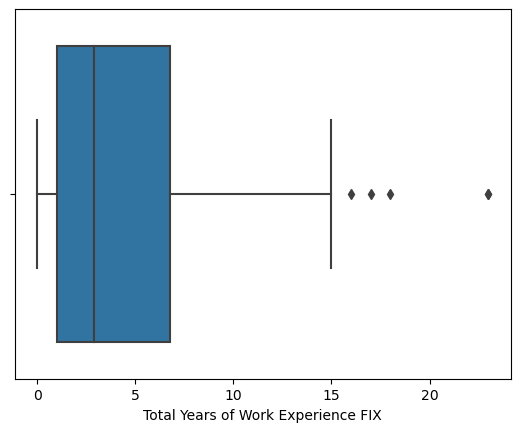

In [22]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [23]:
def find_outliers_iqr(data):
    # Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    
    # Hitung batas bawah dan atas untuk menemukan outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Temukan outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

# Mengidentifikasi kolom-kolom dengan outliers dan menghitung jumlah outliers
columns_with_outliers = {}
outliers_counts = {}

for column in df.columns:
    if df[column].dtype in ['float64']:
        outliers = find_outliers_iqr(df[column])
        if not outliers.empty:
            columns_with_outliers[column] = outliers
            outliers_counts[column] = len(outliers)

# Menampilkan hasil
print("Columns with outliers:", columns_with_outliers)
print("Outliers counts:", outliers_counts)

Columns with outliers: {'Total Years of Work Experience FIX': 46     23.0
65     17.0
74     18.0
79     23.0
127    16.0
Name: Total Years of Work Experience FIX, dtype: float64}
Outliers counts: {'Total Years of Work Experience FIX': 5}


In [24]:
# Mendefinisikan fungsi untuk menentukan tingkatan pengalaman
def determine_experience_level(years):
    if years == 0:
        return 'No Experience'
    elif 0 < years <= 2:
        return 'Beginner'
    elif 2 < years <= 8:
        return 'Intermediate'
    else:
        return 'Expert'

# Menambahkan kolom baru berdasarkan fungsi
df['Experience Level'] = df['Total Years of Work Experience FIX'].apply(determine_experience_level)

In [25]:
df.head(30)

,Timestamp,Name,Email,Phone number (08xxxx),Gender,Birth Date,Domicile (City),Domicile (City) FIX,Province,Your Last Position,Your Last Position FIX,Company Industry,Total Years of Work Experience,Total Years of Work Experience FIX,Describe your self (Skill and Competency),Submit your cover letter or resume (PDF Only),How did You Hear About Task Force?,Experience Level
0,2023-05-10 11:34:00,EKo rahadian Prasetyo,ekorahadianp@gmail.com,087874973976,Male,1997-03-08,Jalan kamp kramat,Jakarta Pusat,DKI Jakarta,Jalan kamp kramat RT 04 RW 015,Unknown,Logistic / Forwarder,1,1.0,Mudah beradaptasi dan mudah bergaul kesemua or...,https://drive.google.com/open?id=10HF2nVymZ8Fl...,Unknown,Beginner
1,2023-05-10 11:39:00,MUHAMMAD FAIZ MUZAKKI,muzakki1310@gmail.com,0877250017,Male,2001-10-13,Jakarta Timur,Jakarta Timur,DKI Jakarta,staff hub,Staff Hub,Expedition,2 tahun,2.0,sayaa mempunyai semngat kerja yang tinggi dan ...,https://drive.google.com/open?id=17OdYYoFYS7fd...,Unknown,Beginner
2,2023-05-10 11:44:00,Michael Roberto,michaelrobertoseran@gmail.com,088289015855,Male,1998-06-29,Bekasi,Bekasi,Jawa Barat,PT.andiarta muzizat ( ninja express ),Unknown,Logistic / Forwarder,2 years,2.0,i can use Microsoft office,https://drive.google.com/open?id=1V0Lv8B9LMZB8...,Unknown,Beginner
3,2023-05-10 12:21:00,Firmansyah,firman.damonz45@gmail.com,082127348513,Male,1985-11-27,Jl.dato tonggara RT 10 RW 10 Kramat jati,Jakarta Timur,DKI Jakarta,Operator,Operator,Logistic / Forwarder,8 bulan,0.7,Saya mempunyai Skill dan Competency,NaN,Unknown,Beginner
4,2023-05-10 12:44:00,Rosario Saputra,rosariosaputra960@gmail.com,085773751887,Male,1997-11-14,Bogor,Bogor,Jawa Barat,Surveyor,Surveyor,Logistic / Forwarder,Fresh grads,0.0,Fresh grads,https://drive.google.com/open?id=175umpdvA27M0...,Unknown,No Experience
5,2023-05-10 13:26:00,Lutfi Nuralamsyah,lutvinuralamsyah@gmail.com,087774401577,Male,1994-11-08,jakarta timur,Jakarta Timur,DKI Jakarta,logistic,Logistic,Logistic / Forwarder,1,1.0,teknisi,https://drive.google.com/open?id=1aRiuL7mL-lGm...,Unknown,Beginner
6,2023-05-10 13:54:00,Lutfi Nuralamsyah,saddahlatifah@gmail.com,088293371287,Female,2003-07-16,Jakarta timur,Jakarta Timur,DKI Jakarta,Deuseyo all you can eat,Unknown,Logistic / Forwarder,Kurang dari 1 tahun,1.0,Dapat memahami pekerjaan baru\nDapat menjual p...,https://drive.google.com/open?id=1wA1Y2x3nSoGi...,Unknown,Beginner
7,2023-05-10 14:17:00,Septian Simbolon,Septiansimbolon608@gmail.com,08216183654,Male,2000-09-23,Jakarta Selatan,Jakarta Selatan,DKI Jakarta,Jakarta Selatan,Unknown,Logistic / Forwarder,0,0.0,Mahasiswa Jurusan Sistem Informasi Angkatan 20...,https://drive.google.com/open?id=153V91UdHvQ3t...,Unknown,No Experience
8,2023-05-10 14:26:00,Aris Yunandar,yunandararis97@gmail.com,08211235988,Male,1997-06-12,Jakarta,Jakarta,DKI Jakarta,Staf Operasional,Staff Operasional,Expedition,4,4.0,Mampu Bekerja dalam team,https://drive.google.com/open?id=1N8X12otWK4-A...,Unknown,Intermediate
9,2023-05-10 14:51:00,Mohammad Risqi Fauji,risqifauzi14@gmail.com,081912367827,Male,1998-09-06,Jakarta,Jakarta,DKI Jakarta,Operasional Cost Control,Operasional Cost Control,Logistic / Forwarder,8 Years,8.0,"Microsoft Office, Manajemen data, Financial Re...",https://drive.google.com/open?id=1H0rHjJ_698mK...,Unknown,Intermediate


In [26]:
df.to_excel('data/TaskForceCandidate_Clean2.xlsx', index=False)

In [27]:
df.dtypes

Timestamp                                        datetime64[ns]
Name                                                     object
Email                                                    object
Phone number (08xxxx)                                    object
Gender                                                   object
Birth Date                                       datetime64[ns]
Domicile (City)                                          object
Domicile (City) FIX                                      object
Province                                                 object
Your Last Position                                       object
Your Last Position FIX                                   object
Company Industry                                         object
Total Years of Work Experience                           object
Total Years of Work Experience FIX                      float64
Describe your self (Skill and Competency)                object
Submit your cover letter or resume (PDF 